# Deep_Learning_from_Scratch_1 - part3

#### 딥러닝의 기본적인 내용을 정리하였습니다. 밑바닥부터 시작하는 딥러닝(사이토 고키 지음)을 참고하였습니다. 

## 4. 신경망 학습
#### - 학습 : 훈련 데이테러부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
#### - 학습은 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것을 목표로 한다. 
### 4.1 데이터에서 학습한다!
#### 4.1.1 데이터 주도 학습
#### - 기계학습의 생명은 데이터이다. 
#### - 기계학습에서는 사람의 개입을 최소화하고 수집한 데이터로부터 패턴을 찾으려 시도한다. 
#### - 특징(feature) : 입력 데이터에서 본질적인 데이터를 정확하게 추출할 수 있도록 설계된 변환기, 적절한 특징은 사람이 생각해내야 한다.
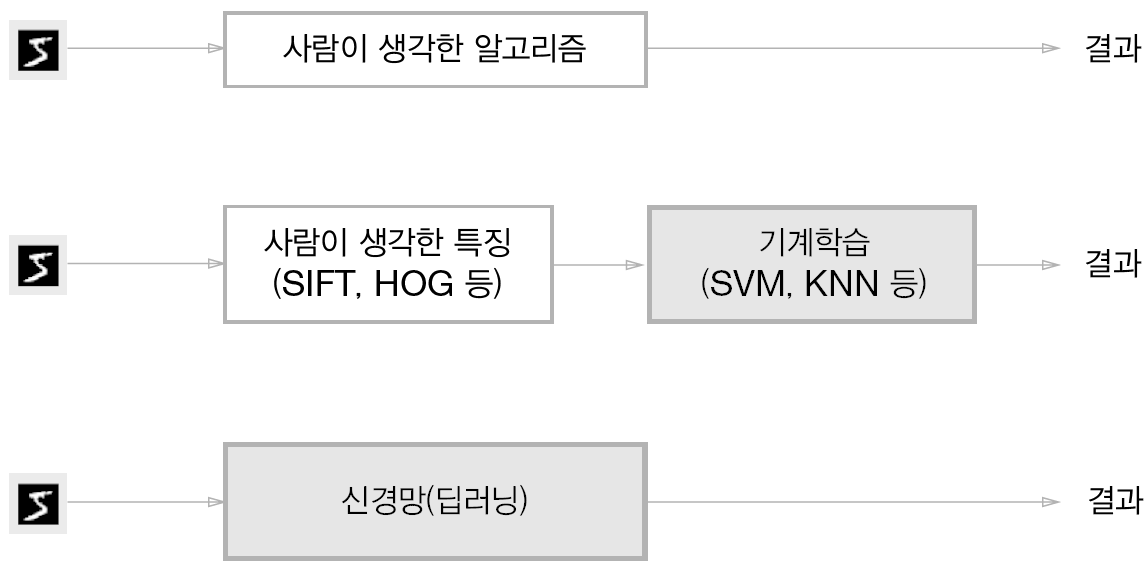
#### - 딥러닝을 종단간기계학습(end-to-end machine learning)이라고도 한다. 즉, 모든 문제를 주어진 데이터 그대로 입력 데이터로 활용해 학습

#### 4.1.2 훈련 데이터와 시험 데이터 
#### - 훈련데이터만 사용하여 학습하면서 최적의 매개변수를 찾는다.

### 4.2 손실 함수 
#### - 신경망 학습에서 사용하는 지표, 일반적으로 오차제곱합과 교차 엔트로피 오차를 사용
#### 4.2.1 오차제곱합
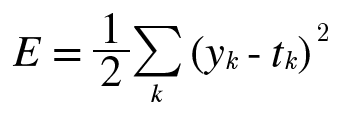


In [1]:
import numpy as np
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t) ** 2)

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


#### 4.2.2 교차 엔트로피 오차
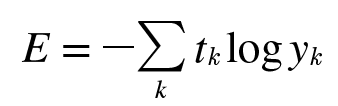

In [2]:
def cross_entropy_error(y, t):
    delta = 1e-7 # -inf 회피 목적
    return -np.sum(t * np.log(y+delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


#### 4.2.3 미니배치 학습
#### - 모든 훈련데이터에 대한 교차엔트로피
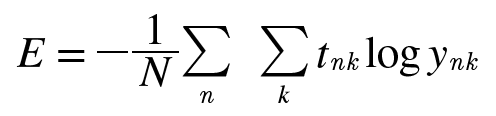
#### - 미니배치 : 훈련 데이터의 일부
#### - 미니배치 학습 : 미니배치 데이터를 활용하여 학습

#### 4.2.4 (배치용) 교차 엔트로피 오차 구현

In [16]:
def cross_entropy_error(y, t):
    if y.ndim ==1 :
        t = t.shape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

#### 4.2.5 왜 손실 함수를 설정하는가?
#### - 신경망 학습에서 최적의 매개변수를 탐색할 때 손실 함수의 값을 가능한 작게 만드는 매개변수 값을 찾는다. 이 때 매개변수의 미분을 계산하고, 해당 미분 값을 토대로 매개변수의 값을 갱신
#### - 신경망 학습 시 정확도를 지표로 삼으면 매개변수의 미분이 대부분 0이 되기 때문에 사용하지 않는다.
#### - 손실 함수의 기울기가 0이 되지 않아야 신경망 학습이 제대로 된다

### 4.3 수치 미분
#### 4.3.1 미분
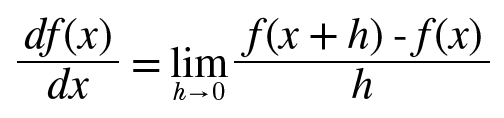

In [6]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

#### 4.3.2 수치 미분의 예

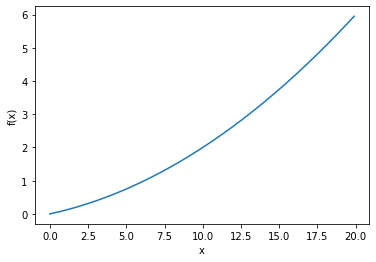

In [7]:
def function_1(x):
    return 0.01 *x**2 + 0.1*x

import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [8]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


#### 4.3.3 편미분

### 4.4 기울기 
#### - 기울기(gradient) : 모든 변수의 편미분을 벡터로 정리한 것

In [9]:
def function_2(x):
    return x[0]**2 + x[1]**2

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


#### - 기울기가 가르키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향
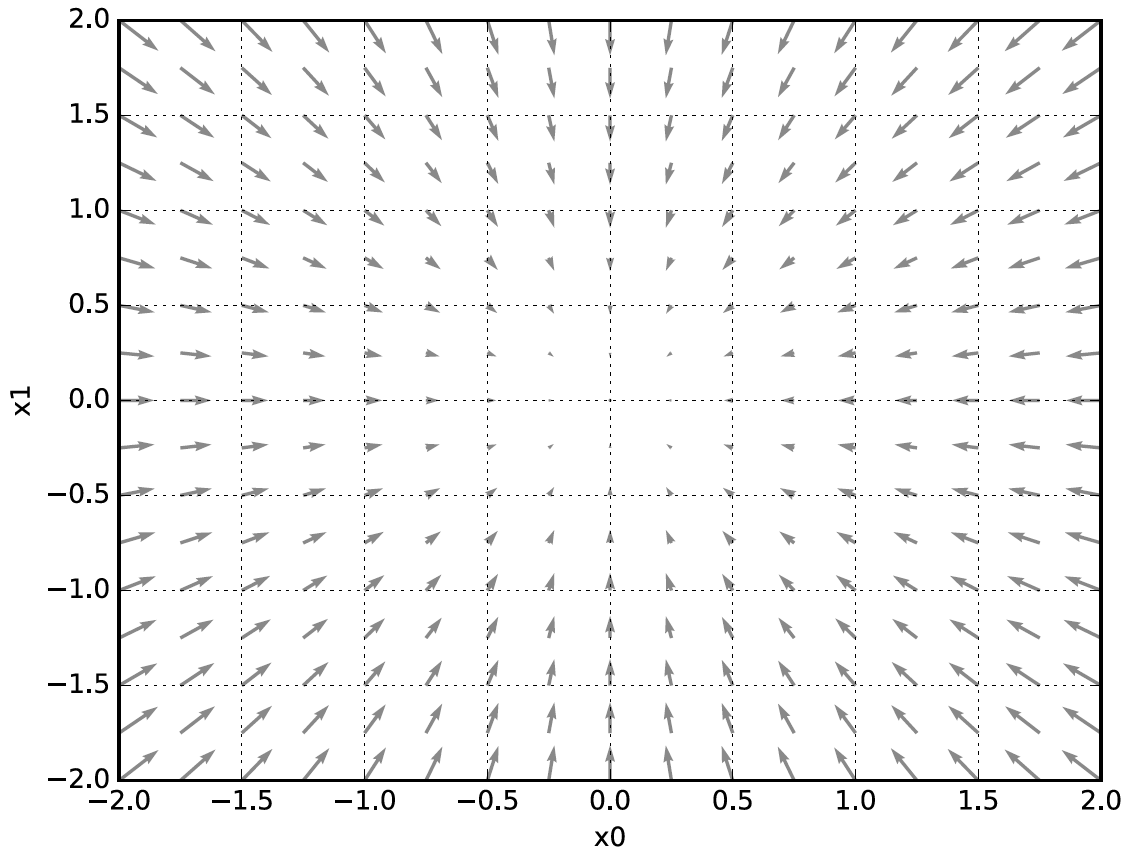
#### 4.4.1 경사법(경사 하강법)
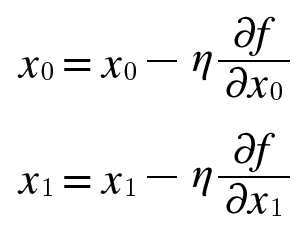
#### - 에타 = 학습률(learning rate)
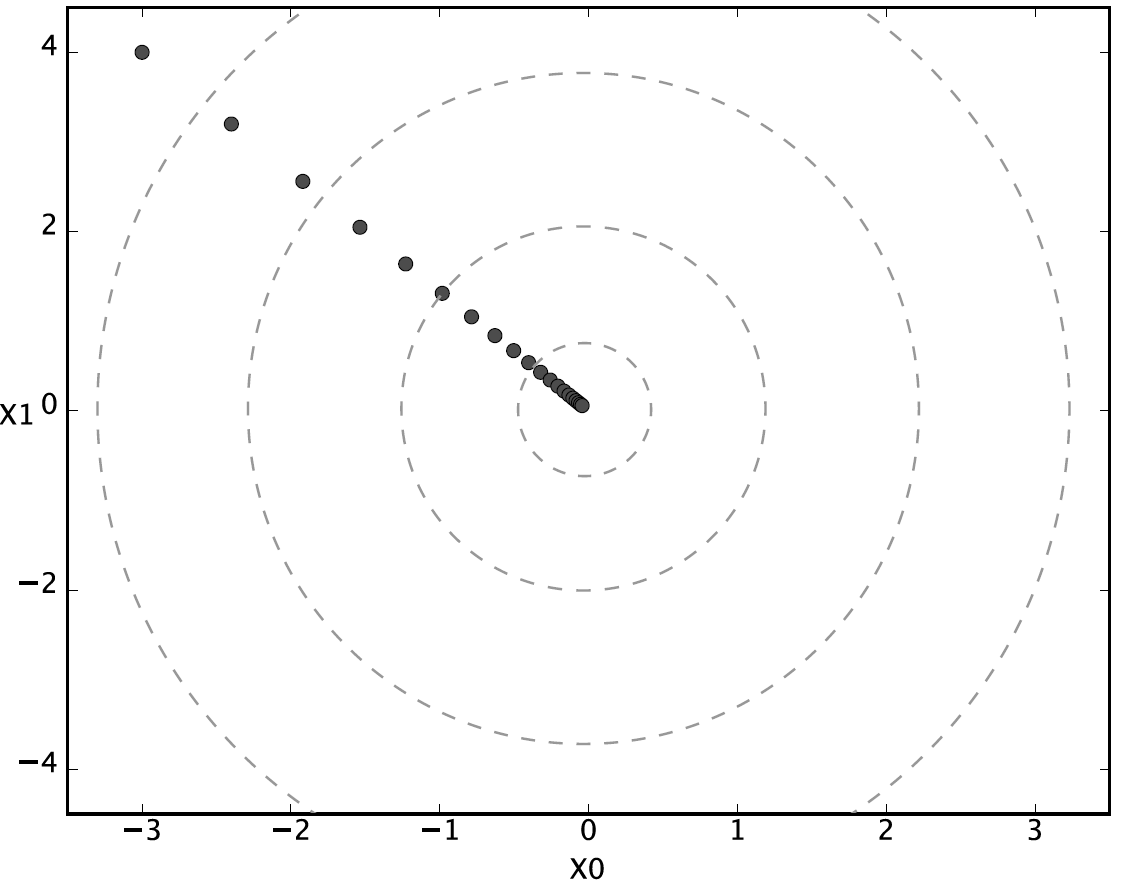

In [11]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr=0.1))

[-6.11110793e-10  8.14814391e-10]


#### 4.4.2 신경망에서의 기울기
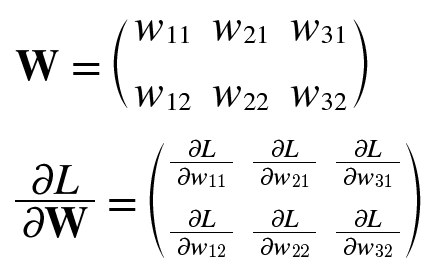


### 4.5 학습 알고리즘 구현하기
#### 4.5.1 2층 신경망 클래스 구현하기

In [18]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, 
                 output_size, weight_init_std =0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis =1)
        t = np.argmax(t, axis =1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    

net = TwoLayerNet(input_size = 784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

x = np.random.randn(100, 784)
y = net.predict(x)

t = np.random.randn(100, 10)
grads = net.numerical_gradient(x, t)
print(grads.params['W1'].shape)
print(grads.params['b1'].shape)
print(grads.params['W2'].shape)
print(grads.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


IndexError: index 784 is out of bounds for axis 0 with size 784

#### 4.5.2 미니배치 학습 구현하기
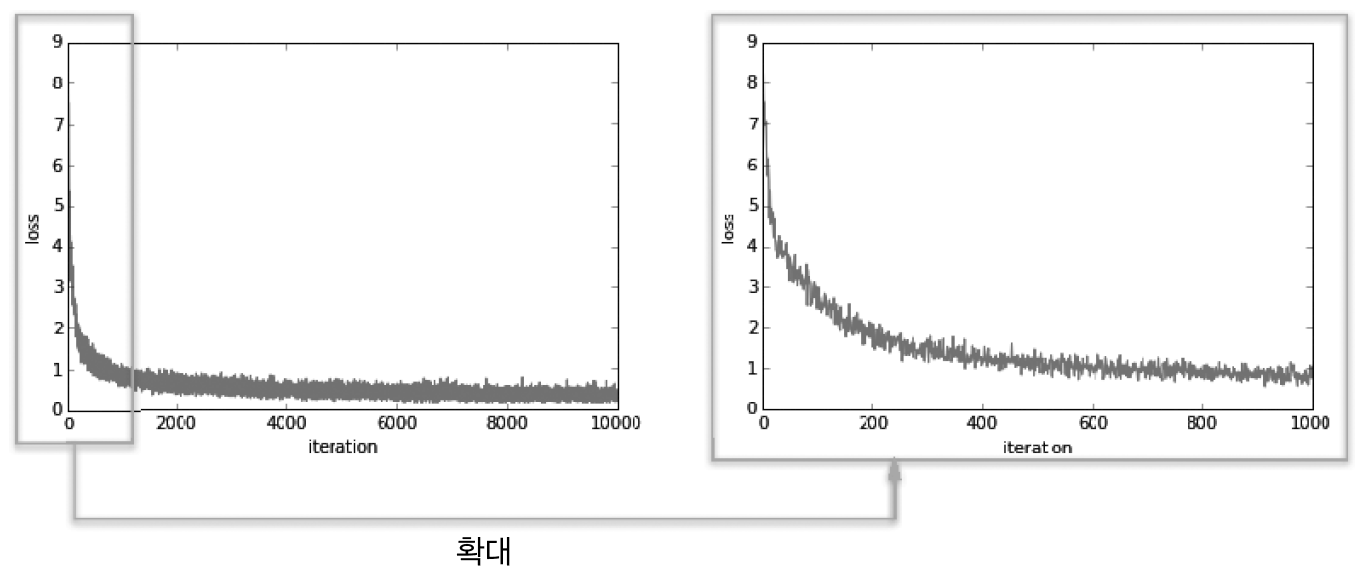

#### 4.5.3 시험 데이터로 평가하기
#### - 1epoch = 모든 학습 데이터를 소진했을 때의 횟수
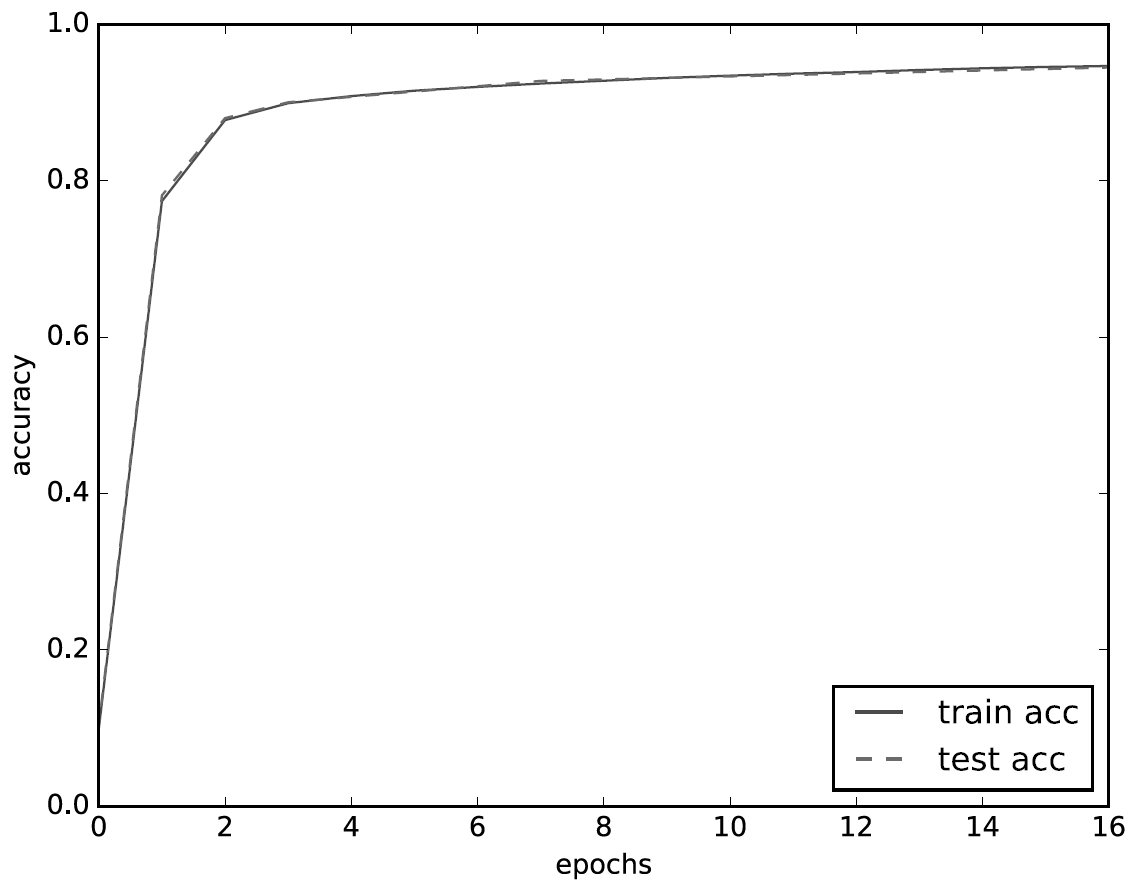